In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
from FRespuestastyfdefiltrosFIReIIR import FIRrespt,IIRrespt,FIRrespf,IIRrespf
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FMedia_Movil import MovingAverage
from scipy.optimize import curve_fit
from scipy import signal #detrend
from scipy.fftpack import fft, fftfreq, ifft

importing Jupyter notebook from FRespuestastyfdefiltrosFIReIIR.ipynb
importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FMedia_Movil.ipynb


<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-31 a la(s) 15.48.23.png">

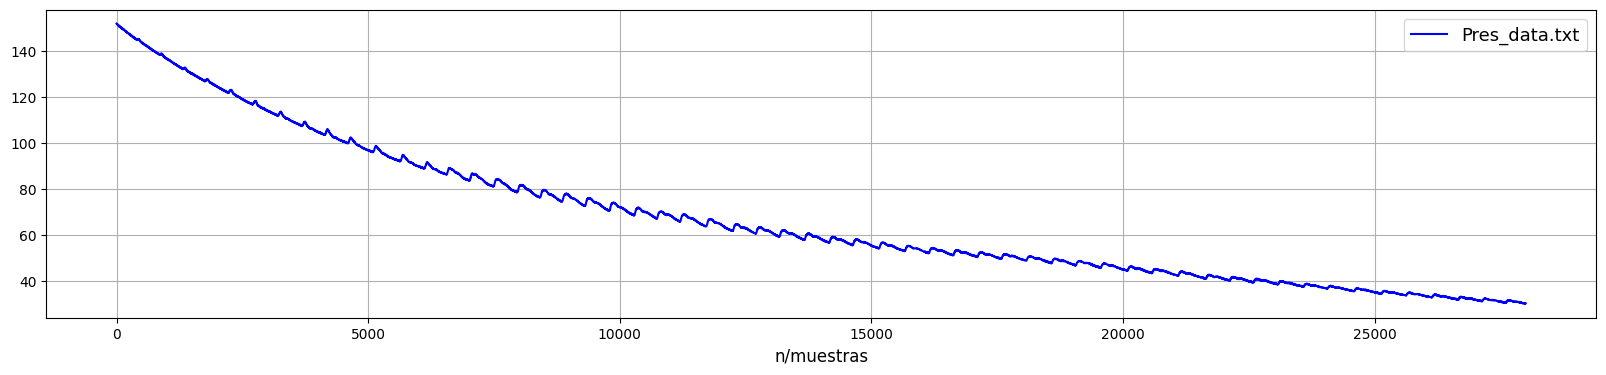

In [2]:
pres = np.loadtxt('Pres_data.txt')
N = len(pres); n = np.arange(N)

plt.figure(figsize=(20,4))
plt.plot(n,pres,label='Pres_data.txt',color="blue")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [3]:
#Empleando suavizado con filtro Savitzky-Golay

y_4 = signal.savgol_filter (pres,1101,3) #window size 1201, polynomial orden 3 

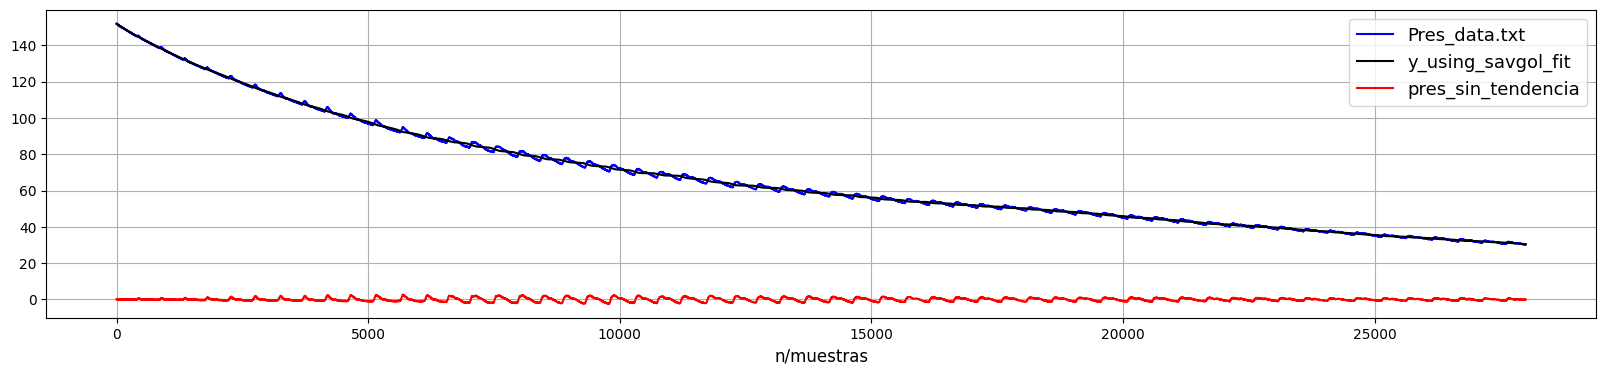

In [4]:
y_44 = pres - y_4

plt.figure(figsize=(20,4))
plt.plot(n, pres,label='Pres_data.txt',color="blue")
plt.plot(n,y_4,'k',label='y_using_savgol_fit')
plt.plot(n,y_44,'r',label='pres_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

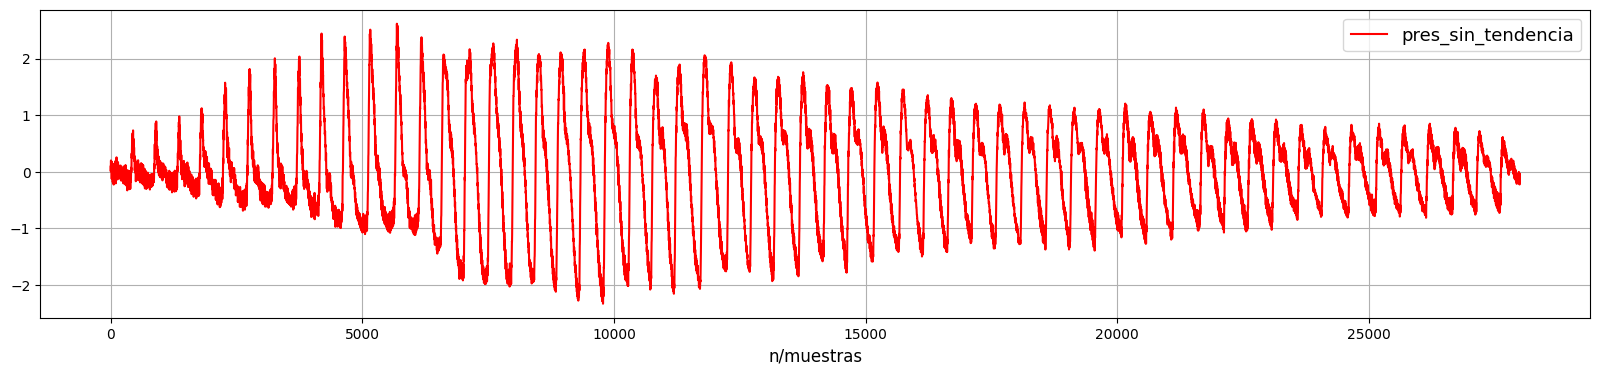

In [5]:
plt.figure(figsize=(20,4))
plt.plot(n,y_44,'r',label='pres_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

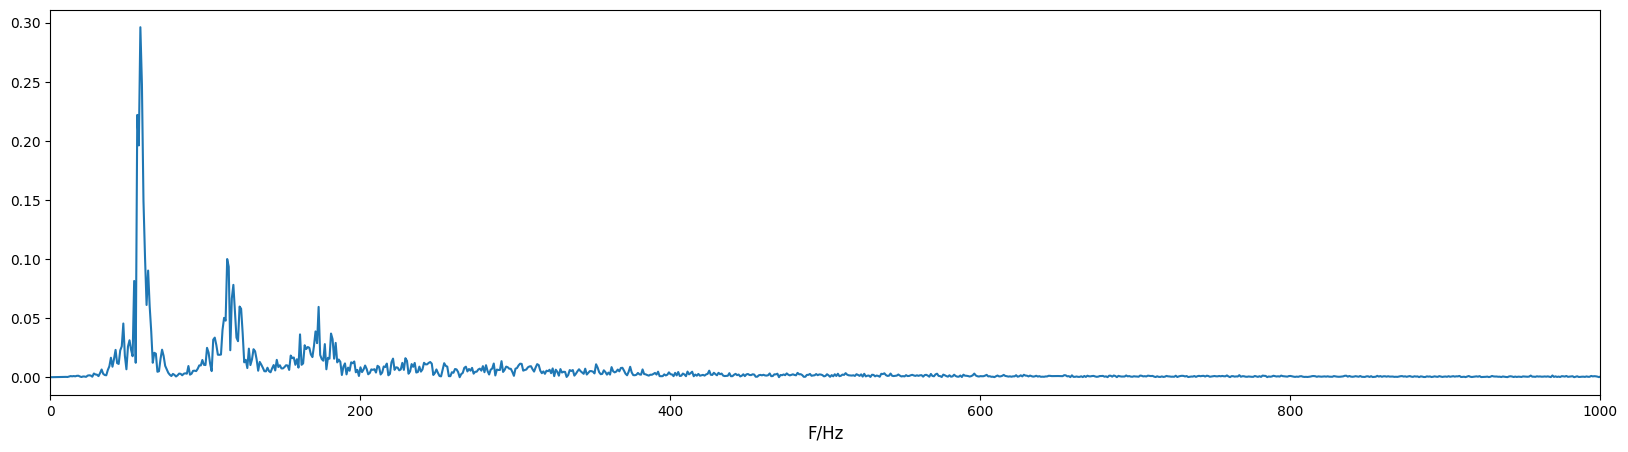

In [6]:
espec = Espectro(y_44)
p = np.arange(N)


plt.figure(figsize=(20,5))
plt.plot(p,abs(espec))
plt.xlabel('F/Hz',fontsize=12)
#plt.xlim(240,255)
plt.xlim (0,1000)
#plt.ylim(0,0.1)
plt.show()

In [7]:
esp_fil = np.copy(espec)

ventana = np.piecewise(p, [abs(p-N/2)>11500],[lambda p: 1, lambda p: 0])

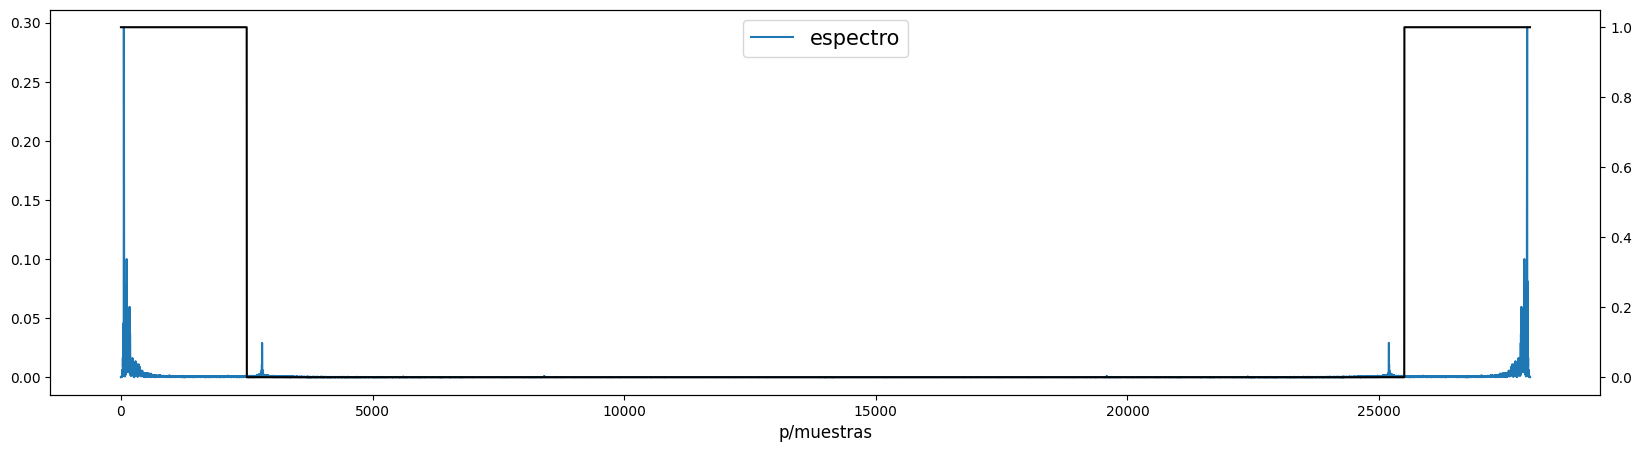

In [8]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(espec),label='espectro')
plt.legend(fontsize=15)
plt.xlabel('p/muestras',fontsize=12)
plt.twinx()
plt.plot(p,ventana,'k')
plt.show()

In [9]:
espfiltr = espec * ventana

In [10]:
pres_fil = señal(espfiltr)

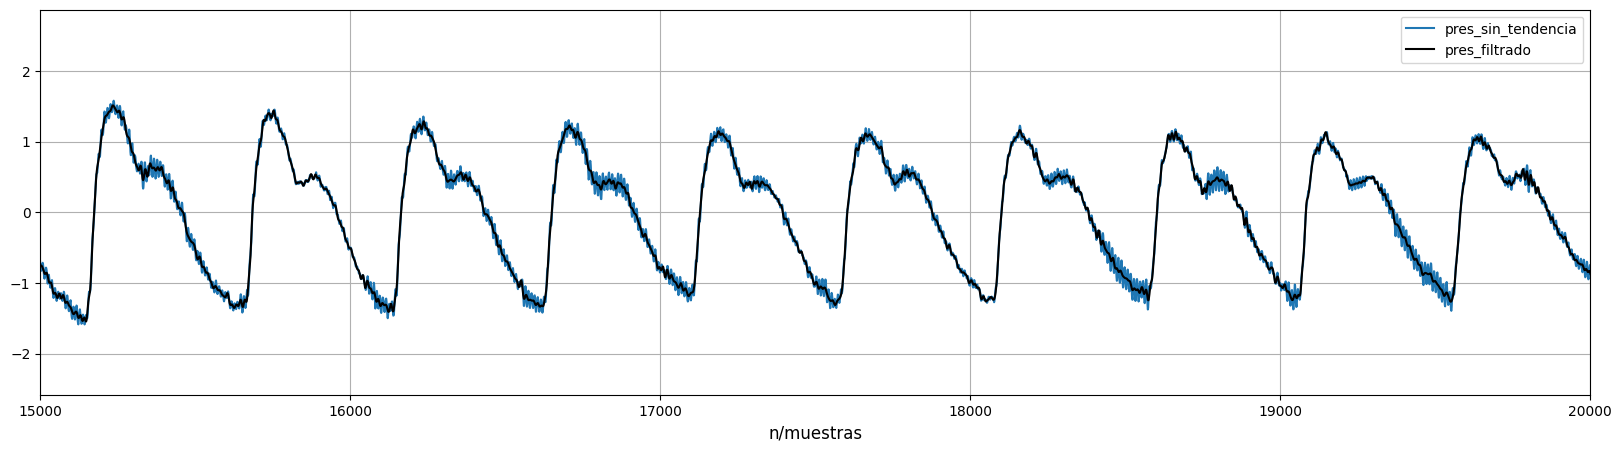

In [11]:
plt.figure(figsize=(20,5))
plt.plot(n,y_44,label='pres_sin_tendencia')
plt.plot(n,pres_fil,'k',label='pres_filtrado')
plt.legend()
plt.xlabel('n/muestras',fontsize=12)
plt.xlim (15000,20000)
plt.grid (True)
plt.show()